In [47]:
library(dplyr)
library(ggplot2)

In [48]:
endo_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [49]:
#### MOFA

In [50]:
MOFA_results_folder = paste0(endo_folder, 'MOFA10/new4/')
mofa_filename = paste0(MOFA_results_folder, 'summary.csv')
mofa = read.csv(mofa_filename, row.names=1)
mofa$gene_name = mofa$gene
mofa$gene = gsub("_.*","",mofa$gene)
head(mofa)

,gene,n_snps,chrom,pv_raw,snpID,pv,gene_name
0,ENSG00000140905,1,16,0.02606257,16_81118466_A_G,0.02606257,ENSG00000140905_GCSH
1,ENSG00000011523,2,2,0.03995225,2_65279223_C_T,0.07990451,ENSG00000011523_CEP68
2,ENSG00000011523,2,2,0.11966021,2_65290842_C_A,0.23932042,ENSG00000011523_CEP68
3,ENSG00000178814,1,8,0.92344836,8_145114924_G_C,0.92344836,ENSG00000178814_OPLAH
4,ENSG00000013583,1,12,0.46967349,12_13154105_A_T,0.46967349,ENSG00000013583_HEBP1
5,ENSG00000143942,1,2,0.68758852,2_54010876_C_A,0.68758852,ENSG00000143942_CHAC2


In [51]:
nrow(mofa)

[1] 4470

In [52]:
#### PCA

In [85]:
outdir = paste0(endo_folder,"REVISION/CRM_int_PCA/")
pca_filename = paste0(outdir, 'summary.csv')
pca = read.csv(pca_filename, row.names=1)
head(pca)

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000140905,1,16,0.3175517,16_81118466_A_G
1,ENSG00000011523,2,2,0.3672796,2_65279223_C_T
2,ENSG00000011523,2,2,0.1305098,2_65290842_C_A
3,ENSG00000178814,1,8,0.8321406,8_145114924_G_C
4,ENSG00000013583,1,12,0.1891256,12_13154105_A_T
5,ENSG00000143942,1,2,0.7382435,2_54010876_C_A


In [86]:
unique(pca$chrom)[order(unique(pca$chrom))]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

In [87]:
nrow(pca)

[1] 4416

In [88]:
# pca = pca[pca$chrom == 22,]

In [89]:
### join

In [90]:
df_plot = inner_join(mofa, pca, by=c("snpID","gene"), suffix=c(".m",".p"))

In [91]:
cor.test(-log10(df_plot$pv_raw.m),-log10(df_plot$pv_raw.p))


	Pearson's product-moment correlation

data:  -log10(df_plot$pv_raw.m) and -log10(df_plot$pv_raw.p)
t = 26.478, df = 4414, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3444835 0.3953952
sample estimates:
      cor 
0.3702173 


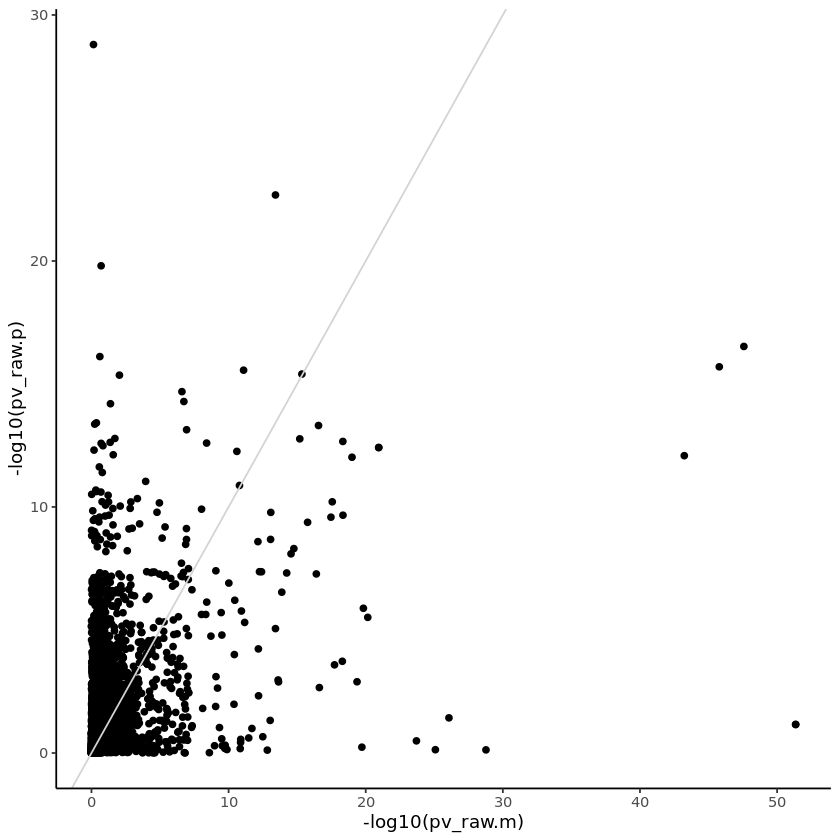

In [92]:
p = ggplot(df_plot, aes(x=-log10(pv_raw.m),y=-log10(pv_raw.p))) + geom_point()
p + theme_classic() + geom_abline(col="lightgrey") #+ xlim(c(0,25)) + ylim(c(0,25))